In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-21 00:00:00+09:00,28059.509766,28502.289062,28038.160156,28283.029297,216600000,0.0,0.0
2022-11-28 00:00:00+09:00,28220.560547,28423.460938,27662.119141,27777.900391,386800000,0.0,0.0
2022-12-05 00:00:00+09:00,27752.990234,27952.800781,27415.660156,27901.009766,322400000,0.0,0.0
2022-12-12 00:00:00+09:00,27741.099609,28195.689453,27488.830078,27527.119141,291200000,0.0,0.0
2022-12-19 00:00:00+09:00,27279.919922,27349.580078,26106.380859,26235.250000,445000000,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-21 00:00:00+09:00,38960.199219,39119.671875,37712.191406,37913.921875,504200000,0.0,0.0
2024-10-28 00:00:00+09:00,37757.949219,39417.878906,37757.949219,38053.671875,710400000,0.0,0.0
2024-11-04 00:00:00+09:00,38274.218750,39884.011719,38159.730469,39500.371094,639900000,0.0,0.0


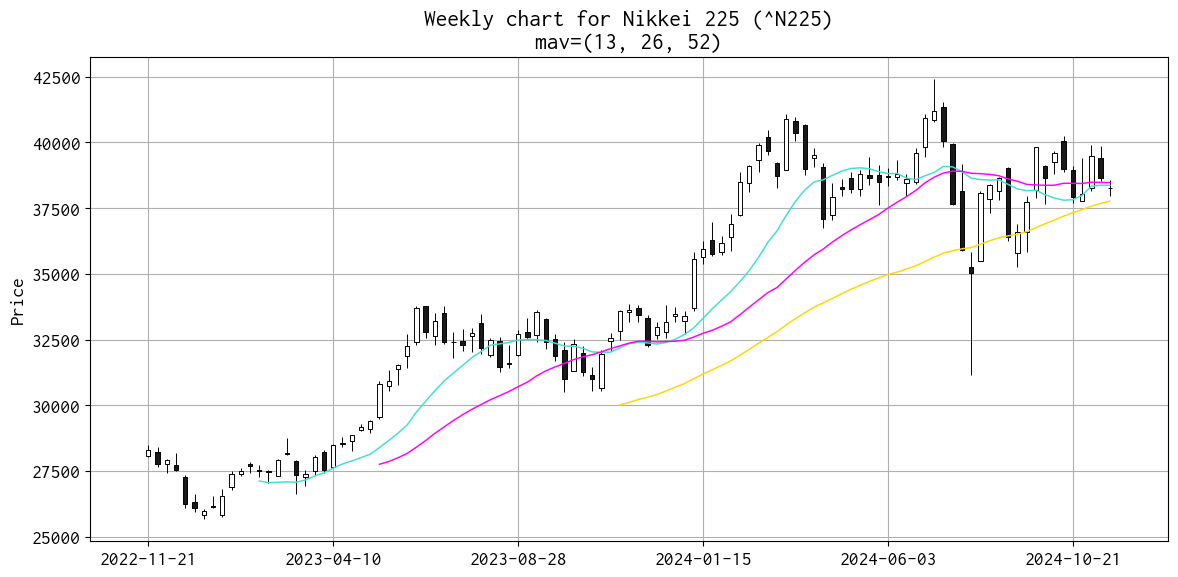

In [9]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [3]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-11 00:00:00+09:00,39417.210938,39866.718750,38535.699219,38642.910156,713800000,0.0,0.0
2024-11-18 00:00:00+09:00,38259.589844,38560.101562,37945.210938,38283.851562,420600000,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-11-11 00:00:00+09:00    38642.910156
2024-11-18 00:00:00+09:00    38283.851562
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-11-11 00:00:00+09:00           NaN
2024-11-18 00:00:00+09:00   -228.480469
Name: Close, dtype: float64

In [6]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2024-11-18 00:00:00+09:00    24.261719
dtype: float64

In [7]:
df['Close'].rolling(26).mean()

Date
2022-11-21 00:00:00+09:00             NaN
2022-11-28 00:00:00+09:00             NaN
2022-12-05 00:00:00+09:00             NaN
2022-12-12 00:00:00+09:00             NaN
2022-12-19 00:00:00+09:00             NaN
                                 ...     
2024-10-21 00:00:00+09:00    38445.078275
2024-10-28 00:00:00+09:00    38438.062951
2024-11-04 00:00:00+09:00    38486.957632
2024-11-11 00:00:00+09:00    38481.401142
2024-11-18 00:00:00+09:00    38467.468149
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2022-11-21 00:00:00+09:00             NaN
2022-11-28 00:00:00+09:00             NaN
2022-12-05 00:00:00+09:00             NaN
2022-12-12 00:00:00+09:00             NaN
2022-12-19 00:00:00+09:00             NaN
                                 ...     
2024-10-21 00:00:00+09:00    37327.656851
2024-10-28 00:00:00+09:00    37445.037260
2024-11-04 00:00:00+09:00    37578.349985
2024-11-11 00:00:00+09:00    37675.613657
2024-11-18 00:00:00+09:00    37767.707858
Name: Close, Length: 105, dtype: float64